# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [3]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [4]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [7]:
sample = pd.DataFrame({"EXT_SOURCE_3": app_train['EXT_SOURCE_3']})
sample["equal_freq_EXT_SOURCE_3"] = pd.qcut(sample["EXT_SOURCE_3"], 10)
sample["equal_freq_EXT_SOURCE_3"].value_counts().sort_index()

(-0.000473, 0.228]    24701
(0.228, 0.33]         24744
(0.33, 0.408]         25057
(0.408, 0.476]        24689
(0.476, 0.535]        24186
(0.535, 0.592]        25392
(0.592, 0.643]        24725
(0.643, 0.694]        24745
(0.694, 0.749]        23675
(0.749, 0.896]        24632
Name: equal_freq_EXT_SOURCE_3, dtype: int64

In [8]:
age_data = pd.DataFrame({"TARGET":app_train['TARGET'],"YEARS_BIRTH": app_train['DAYS_BIRTH']/365})

In [9]:
print(age_data)

        TARGET  YEARS_BIRTH
0            1    25.920548
1            0    45.931507
2            0    52.180822
3            0    52.068493
4            0    54.608219
5            0    46.413699
6            0    37.747945
7            0    51.643836
8            0    55.065753
9            0    39.641096
10           0    27.936986
11           0    55.936986
12           0    36.819178
13           0    38.591781
14           0    39.953425
15           0    23.912329
16           0    35.427397
17           0    26.783562
18           0    48.542466
19           0    31.090411
20           0    50.005479
21           0    40.589041
22           0    30.536986
23           0    68.019178
24           0    30.920548
25           0    52.969863
26           1    51.298630
27           0    43.693151
28           0    27.380822
29           0    28.331507
...        ...          ...
307481       1    56.558904
307482       0    38.646575
307483       0    68.249315
307484       0    35

In [10]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

In [11]:
print(age_data)

        TARGET  YEARS_BIRTH  YEARS_BINNED
0            1    25.920548  (25.0, 30.0]
1            0    45.931507  (45.0, 50.0]
2            0    52.180822  (50.0, 55.0]
3            0    52.068493  (50.0, 55.0]
4            0    54.608219  (50.0, 55.0]
5            0    46.413699  (45.0, 50.0]
6            0    37.747945  (35.0, 40.0]
7            0    51.643836  (50.0, 55.0]
8            0    55.065753  (55.0, 60.0]
9            0    39.641096  (35.0, 40.0]
10           0    27.936986  (25.0, 30.0]
11           0    55.936986  (55.0, 60.0]
12           0    36.819178  (35.0, 40.0]
13           0    38.591781  (35.0, 40.0]
14           0    39.953425  (35.0, 40.0]
15           0    23.912329  (20.0, 25.0]
16           0    35.427397  (35.0, 40.0]
17           0    26.783562  (25.0, 30.0]
18           0    48.542466  (45.0, 50.0]
19           0    31.090411  (30.0, 35.0]
20           0    50.005479  (50.0, 55.0]
21           0    40.589041  (40.0, 45.0]
22           0    30.536986  (30.0

In [12]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,YEARS_BIRTH
YEARS_BINNED,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111436,27.822518
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


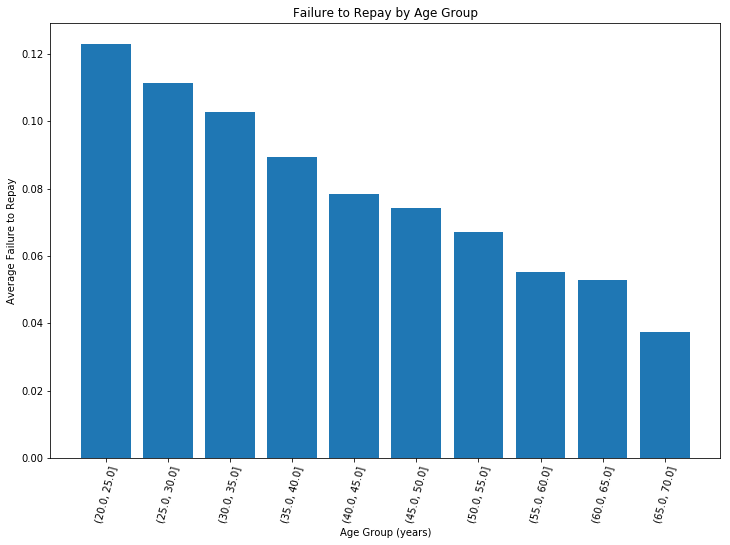

In [13]:
plt.figure(figsize = (12, 8))
# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');